torch.Size([1, 200, 300, 3]) torch.Size([1, 200, 300, 1])
dict_keys(['camera_ids', 'gaussian_ids', 'radii', 'means2d', 'depths', 'conics', 'opacities', 'tile_width', 'tile_height', 'tiles_per_gauss', 'isect_ids', 'flatten_ids', 'isect_offsets', 'width', 'height', 'tile_size', 'n_cameras'])


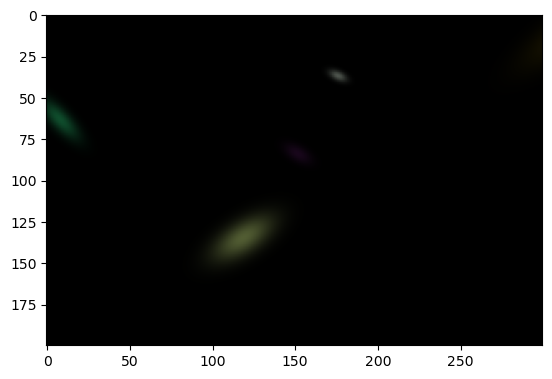

In [9]:
import torch
from gsplat.rendering import rasterization
import matplotlib.pyplot as plt 

device="cuda"
# define Gaussians
means = torch.randn((100, 3), device=device)
quats = torch.randn((100, 4), device=device)
scales = torch.rand((100, 3), device=device) * 0.1
colors = torch.rand((100, 3), device=device)
opacities = torch.rand((100,), device=device)
# define cameras
viewmats = torch.eye(4, device=device)[None, :, :]
Ks = torch.tensor([
   [300., 0., 150.], [0., 300., 100.], [0., 0., 1.]], device=device)[None, :, :]
width, height = 300, 200
# render
colors, alphas, meta = rasterization(
   means, quats, scales, opacities, colors, viewmats, Ks, width, height
)
print (colors.shape, alphas.shape)
print (meta.keys())
plt.imshow(colors.cpu().squeeze())
plt.show()

Frame type: <class 'numpy.ndarray'>
Frame dtype: uint8
Frame shape: (1440, 1920, 3)


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


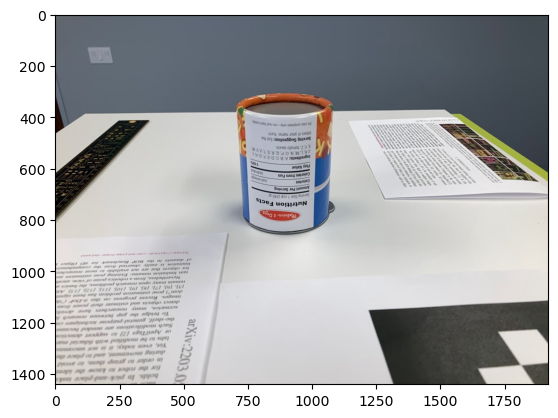

In [ ]:
import numpy as np 
import cv2 
import os 
from PIL import Image
import matplotlib.pyplot as plt 

resize_dim = (200, 200)
scene_path = "/media/jbhayet/Data/datasets/BOP_CHALLENGE/hope/onboarding_static/obj_000001_down"
img_path = "000000.jpg"
frame = np.array(Image.open(os.path.join(scene_path, "rgb", img_path)))
# Debugging info
print(f"Frame type: {type(frame)}")
print(f"Frame dtype: {frame.dtype}")
print(f"Frame shape: {frame.shape}")
plt.imshow(frame)
frame_resized = cv2.resize(src=frame, dsize=resize_dim)

In [1]:
import cv2
import numpy as np

dummy_frame = np.random.randint(0, 255, (1440, 1920, 3), dtype=np.uint8)
resize_dim = (200, 200)
resized_frame = cv2.resize(dummy_frame, resize_dim)
print(f"Resized frame shape: {resized_frame.shape}")


Resized frame shape: (200, 200, 3)
